In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.csv to breast-cancer-wisconsin.csv


In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [ ]:
print(df.describe())

          id_number  clump_thickness  uniformity_of_cell_size  \
count  6.990000e+02       699.000000               699.000000   
mean   1.071704e+06         4.417740                 3.134478   
std    6.170957e+05         2.815741                 3.051459   
min    6.163400e+04         1.000000                 1.000000   
25%    8.706885e+05         2.000000                 1.000000   
50%    1.171710e+06         4.000000                 1.000000   
75%    1.238298e+06         6.000000                 5.000000   
max    1.345435e+07        10.000000                10.000000   

       uniformity_of_cell_shape  marginal_adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_number                    699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df.head()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


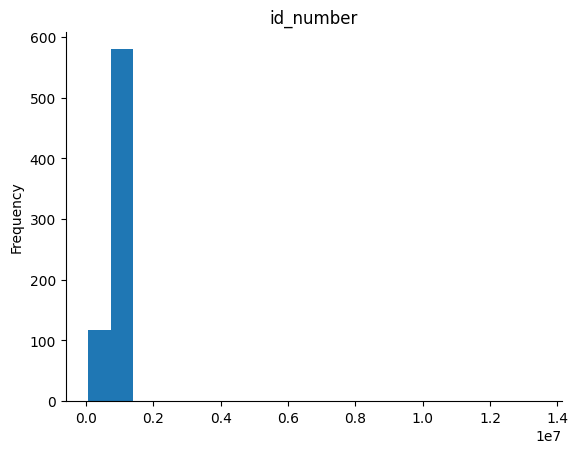

In [ ]:
# @title id_number

from matplotlib import pyplot as plt
df['id_number'].plot(kind='hist', bins=20, title='id_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

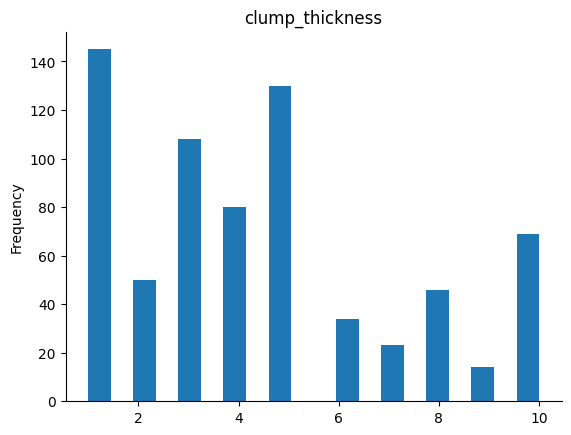

In [ ]:
# @title clump_thickness

from matplotlib import pyplot as plt
df['clump_thickness'].plot(kind='hist', bins=20, title='clump_thickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
df.isna().sum()

id_number                      0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [ ]:
df.isnull().sum()

id_number                      0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [ ]:
column_names = ["id_number", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape",
                "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin",
                "normal_nucleoli", "mitoses", "class"]

In [ ]:
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce')
df['bare_nuclei'].fillna(df['bare_nuclei'].median(), inplace=True)


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['id_number', 'class'], axis = 1))

In [ ]:
df_scaled_dt = pd.DataFrame(df_scaled, columns = column_names[1:-1])

In [ ]:
x = df_scaled_dt #feature
y = df['class'] #target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
ann_classifier = MLPClassifier(hidden_layer_sizes = (10,), max_iter= 1000, random_state = 42)
ann_classifier.fit(x_train, y_train)
ann_accuracy = accuracy_score(y_test, ann_classifier.predict(x_test))


In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)
svm_accuracy = accuracy_score(y_test, svm_classifier.predict(x_test))


In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x_train, y_train)
rf_accuracy = accuracy_score(y_test, random_forest_classifier.predict(x_test))

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return cm, cr, accuracy

In [ ]:
ann_cm, ann_cr, ann_accuracy = evaluate_model(ann_classifier, x_test, y_test)

In [ ]:
svm_cm, svm_cr, svm_accuracy = evaluate_model(svm_classifier, x_test, y_test)

In [ ]:
rf_cm, rf_cr, rf_accuracy = evaluate_model(random_forest_classifier, x_test, y_test)

In [ ]:
print(f"ANN Accuracy: {ann_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

ANN Accuracy: 0.9714
SVM Accuracy: 0.9714
Random Forest Accuracy: 0.9643


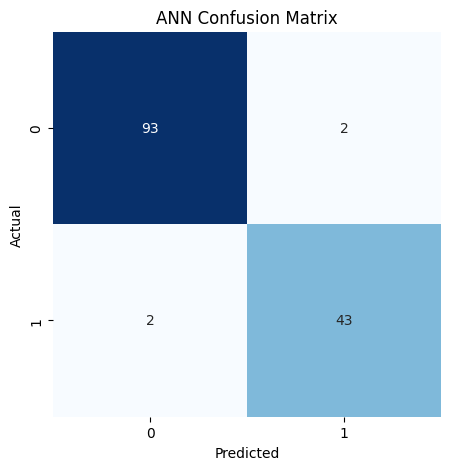

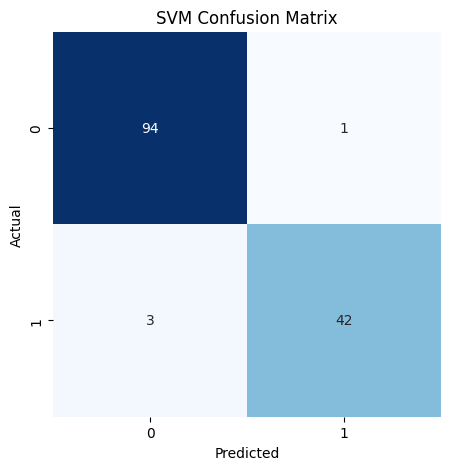

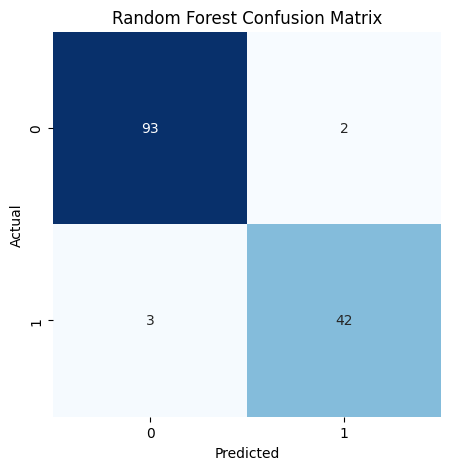

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(ann_cm, "ANN Confusion Matrix")
plot_confusion_matrix(svm_cm, "SVM Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")

In [ ]:
def plot_classification_report(cr, title):
    print(title)
    print(cr)

plot_classification_report(ann_cr, "ANN Classification Report")
plot_classification_report(svm_cr, "SVM Classification Report")
plot_classification_report(rf_cr, "Random Forest Classification Report")


ANN Classification Report
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM Classification Report
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

Random Forest Classification Report
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        95
           4       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0

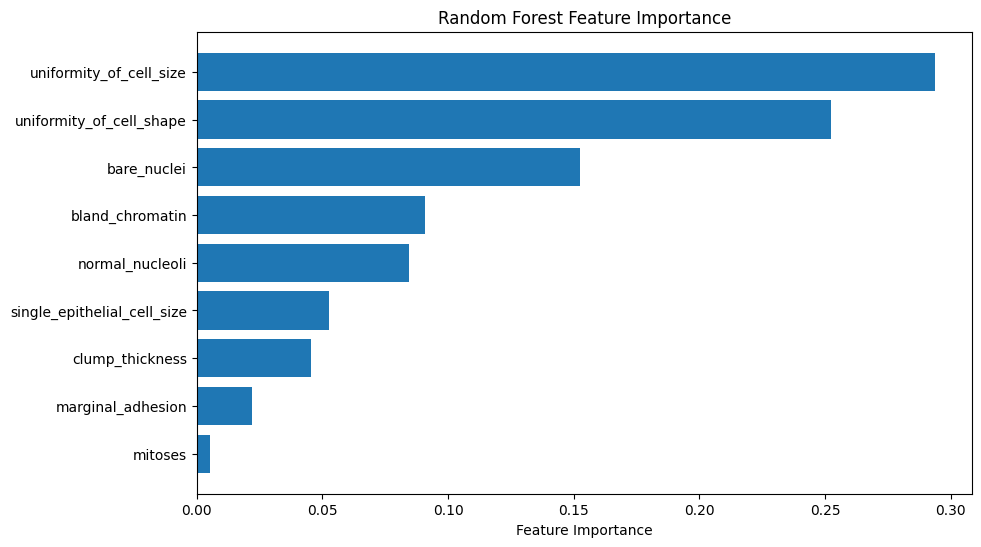

In [ ]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()

plot_feature_importance(random_forest_classifier, x.columns)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

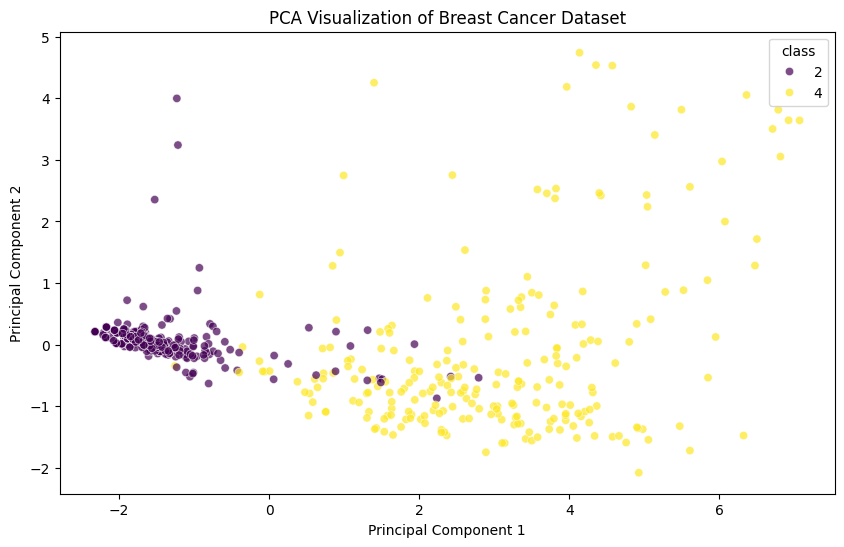

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()